In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

Given grid function $f(x)$ on interval $[a, b]$, divided on pieces $[x_{i-1}, x_i]$, such that $a = x_0 < x_1 ... < x_N = b$. We need to restore it by function  $S_m(x)$ , where $m$ - degree of polynomial, using piecewise-global method.
Cubic spline with defect $3 - p$, called the function $S_3(x)$, which
- on each $[x_{i-1}, x_i]$ is polynomial of degree no greater than 3
- has continious derivatives of degree 1..p on $[a, b]$
- on $x_i$ points $S_3(x_i) = f(x_i)$
- satisfies border conditions $S''(a) = S''(b) = 0$ (natural spline)

### 2. Formulate the functional and differential compatibility conditions [mathematical formula]



$S_{m,i}^{(p)}(x_i) - f^{(p)}(x_i) = 0, i = 0...n - 1$
- if $p = 0$ then functional compatibility condition
- if $p > 0$ then differential compatibility condition

### 3. Formulate stitching conditions [mathematical formula]

$S_{m,i - 1}^{(p)}(x)|_{x=x_i} = S_{m,i}^{(p)}(x)|_{x=x_i}, i = 1...n-1$

### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

- Functional compatibility condition provides a solution to the interpolation problem.
- Differential compatibility conditions ensure that the resulting function is differentiable up to $p$ (2 in our case).
- Stiching conditions ensure that the resulting function is continuous.

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

###### Stage 1: 

Find $a_{0, i}, a_{1, i}, a_{2, i}, a_{3, i}$ for $S_{3, i} = a_{0, i} + a_{1, i}(x - x_i) + a_{2, i}(x - x_i)^2 + a_{3, i}(x - x_i)^3$

Solve the system of the following equations (funcional compatibility conditons and differential compatibility (p = 2) conditions):

$\begin{cases}S_{3, i}(x_i)-f(x_i)=0 \\ S_{3, i}(x_{i + 1})-f(x_{i + 1})=0 \\ S_{3, i}^{''}(x_i)-f^{''}(x_i)=0 \\ S_{3, i}^{''}(x_{i + 1})-f^{''}(x_{i + 1})=0\end{cases}$

Let
- $h_{i + 1} = x_{i + 1} - x_{i}$
- $Δf_i = f_{i + 1} - f_{i}$
- $Δm_i = m_{i + 1} - m_{i}$

then

$\begin{cases}a_{0, i} - f_i = 0 &\Rightarrow& a_{0, i} = f_i \\ a_{0, i} + a_{1, i}h_{i + 1} + a_{2, i}h_{i + 1}^2 + a_{3, i}h_{i + 1}^3 - f_{i + 1} = 0 \\ 2a_{2, i} - m_i = 0 &\Rightarrow& a_{2, i} = \frac{m_i}{2} \\ 2a_{2, i} + 6a_{3, i}h_{i + 1} - m_{i + 1} = 0\end{cases}$

then

$m_i + 6a_{3, i}h_{i + 1} - m_{i + 1} = 0 \Rightarrow a_{3, i} = \frac{Δm_i}{6h_{i + 1}}$

then

$f_i + a_{1, i}h_{i + 1} + \frac{m_i}{2}h_{i + 1}^2 + \frac{Δm_i}{6h_{i + 1}}h_{i + 1}^3 - f_{i + 1} = 0 \Rightarrow -\frac{Δf_i}{h_{i + 1}} + a_{1, i} + \frac{m_i}{2}h_{i + 1} + \frac{Δm_i}{6}h_{i + 1} = 0 \Rightarrow a_{1, i} = \frac{Δf_i}{h_{i + 1}} - \frac{h_{i + 1}}{2}m_i - \frac{h_{i + 1}}{6}Δm_i$

so

$S_{3, i} = f_i + (\frac{Δf_i}{h_{i + 1}} - \frac{h_{i + 1}}{2}m_i - \frac{h_{i + 1}}{6}Δm_i)(x - x_i) + \frac{m_i}{2}(x - x_i)^2 + \frac{Δm_i}{6h_{i + 1}}(x - x_i)^3$

###### Stage 2:

$S_{3, i - 1}(x) = f_{i - 1} + (\frac{Δf_{i - 1}}{h_{i}} - \frac{h_{i}}{2}m_{i - 1} - \frac{h_{i}}{6}Δm_{i - 1})(x - x_{i - 1}) + \frac{m_{i - 1}}{2}(x - x_{i - 1})^2 + \frac{Δm_{i - 1}}{6h_{i}}(x - x_{i - 1})^3$

$S_{3, i - 1}^{'}(x_i) = \frac{Δf_{i - 1}}{h_i} - \frac{h_i}{2}m_{i - 1} - \frac{h_i}{6}Δm_{i - 1} + h_im_{i - 1} + \frac{h_i}{2}Δm_{i - 1}$

$S_{3, i}^{'}(x_i) = \frac{Δf_i}{h_{i + 1}} - \frac{h_{i + 1}}{2}m_i - \frac{h_{i + 1}}{6}Δm_i$

By using stitching condition ($S_{3,i - 1}^{'}(x)|_{x=x_i} = S_{3,i}^{'}(x)|_{x=x_i}$):

$\frac{Δf_{i - 1}}{h_i} - \frac{h_i}{2}m_{i - 1} - \frac{h_i}{6}Δm_{i - 1} + h_im_{i - 1} + \frac{h_i}{2}Δm_{i - 1} = \frac{Δf_i}{h_{i + 1}} - \frac{h_{i + 1}}{2}m_i - \frac{h_{i + 1}}{6}Δm_i \Rightarrow$

$\Rightarrow \frac{h_i}{2}m_{i - 1} - \frac{h_i}{6}m_{i} + \frac{h_i}{6}m_{i - 1} + \frac{h_i}{2}m_{i} - \frac{h_i}{2}m_{i - 1} + \frac{h_{i + 1}}{2}m_i - \frac{h_{i + 1}}{6}m_{i + 1} + \frac{h_{i + 1}}{6}m_i = \frac{Δf_i}{h_{i + 1}} - \frac{Δf_{i - 1}}{h_i}$

so:

$\frac{h_i}{6}m_{i - 1} + \frac{h_i + h_{i + 1}}{3}m_i + \frac{h_{i + 1}}{6}m_{i + 1} = \frac{Δf_i}{h_{i + 1}} - \frac{Δf_{i - 1}}{h_i}, i = 1..n-1$

or

$h_im_{i - 1} + 2(h_i + h_{i + 1})m_i + h_{i + 1}m_{i + 1} = 6(\frac{Δf_i}{h_{i + 1}} - \frac{Δf_{i - 1}}{h_i}), i = 1..n-1$

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

$\begin{bmatrix}
2(h_2+h_1) & h_2 & 0 & .. & .. & 0
\\ .. & .. & .. & .. & .. & .. \\ 0 & h_i & 2(h_{i+1}+h_i) & h_{i+1} & 0 & ..
\\ .. & .. & .. & .. & .. & .. \\
0 & .. & .. & 0 & h_{n-1} & 2(h_n+h_{n-1})
\end{bmatrix}
\begin{bmatrix}
m_1 \\ .. \\ m_i \\ .. \\ m_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
6(\frac{\Delta f_1}{h_2}-\frac{\Delta f_0}{h_1}) 
\\ .. \\
6(\frac{\Delta f_i}{h_{i+1}}-\frac{\Delta f_{i-1}}{h_i})
\\ .. \\
6(\frac{\Delta f_{n-1}}{h_n}-\frac{\Delta f_{n-2}}{h_{n-1}})
\end{bmatrix}$

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

The system has n - 2 unknown variables ($m_i, i = 1..n-1$) and it is not closed with respect to $m_i, i = 0..n$. For closure of the system we may set that second derivitives at the ends equal to 0, so $m_0 = m_n = 0$.

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

$\begin{bmatrix}
1 & -P_1 & 0 & .. & .. & 0 & .. & Q_1
\\ 0 & 1 & -P_2 & 0  & 0  & 0 & .. & Q_2
\\ 0 & 0 & 1 & -P_3 & 0 & 0 & .. & Q_3
\\ .. & .. & .. & .. & .. & .. & .. & ..
\\ 0 & 0 & 0 & 0 & 0 & 1 & .. & Q_{n-1}
\end{bmatrix}
$

where $P_i = \frac{h_{i + 1}}{-2(h_{i + 1} + h_i) - h_iP_{i-1}}, Q_i = \frac{h_iQ_{i - 1} - 6(\frac{\Delta f_{i}}{h_{i+1}} - \frac{\Delta f_{i - 1}}{h_{i}})}{-2(h_{i + 1} + h_i) - h_iP_{i-1}}, P_1 = \frac{h_2}{-2(h_2 + h_1)}, Q_1 = -\frac{6(\frac{\Delta f_1}{h_2}-\frac{\Delta f_0}{h_1})}{-2(h_2 + h_1)}$

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

Expanded record of tridiagonal matrix is:  

$\alpha_ix_{i - 1} - \beta_ix_i + \gamma_ix_{i + 1} = \delta_i, \alpha_1=\gamma_n=0, i=1..n$ (1)

If we convert tridiagonal matrix to upper triangular matrix by gaussian elimination, we will get matrix from previous question.
Considering that the last row of this matrix equal to right side (so $x_n = Q_n$) and each upper row depends on downstream row, we get recurrent formula: $x_i = P_ix_{i + 1} + Q_i, i = 1..n-1$ (2). This is reverse pass formula.

$x_{i - 1} = P_{i - 1}x_i + Q_{i - 1}$ (3)

Putting (3) in (1): 

$\alpha_i(P_{i - 1}x_i + Q_{i - 1}) - \beta_ix_i + \gamma_ix_{i + 1} = \delta_i \Rightarrow x_i = \frac{-\gamma_i}{\alpha_iP_{i - 1} - \beta_i}x_{i + 1} + \frac{-\alpha_iQ_{i - 1} + \delta_i}{\alpha_iP_{i - 1} - \beta_i}$

by comparing it with (2):

$P_i = \frac{\gamma_i}{\beta_i - \alpha_iP_{i - 1}}$

$Q_i = \frac{\alpha_iQ_{i - 1} - \delta_i}{\beta_i - \alpha_iP_{i - 1}}$

$P_i$ and $Q_i$ are direct pass formulas.

### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code in ipynb]

In [1]:
import numpy as np

def solve_tdm(A, delta):
 
    n = len(delta)
    
    P = np.zeros(n - 1)
    Q = np.zeros(n - 1)
    
    P[0] = -A[2][0] / A[1][0]
    Q[0] = delta[0] / A[1][0]
 
    for i in range(1, n - 1):
        P[i] = -A[2][i] / (A[1][i] + A[0][i] * P[i - 1])
        Q[i] = (delta[i] - A[0][i] * Q[i - 1]) / (A[1][i] + A[0][i] * P[i - 1])
 
    x = np.zeros(n)
 
    x[n - 1] = (delta[n - 1] - A[0][n - 1] * Q[n - 2]) / (A[1][n - 1] + A[0][n - 1] * P[n - 2])
 
    for i in range(n - 2, -1, -1):
        x[i] = x[i + 1] * P[i] + Q[i]
    
    return x;
 
def build_spline(x, f):
    
    n = len(x)
    
    h = np.zeros(n - 1)
    df = np.zeros(n - 1)
    
    A = np.zeros((3, n - 2))
    delta = np.zeros(n - 2)
    
    for i in range(0, n - 1):
        h[i] = x[i + 1] - x[i]
        df[i] = f[i + 1] - f[i]
 
    for i in range(0, n - 2):
        A[0][i] = h[i]
        A[1][i] = 2 * (h[i] + h[i + 1])
        A[2][i] = h[i + 1]
        delta[i] = 6 * (df[i + 1] / h[i + 1] - df[i] / h[i])

    A[0][0] = 0;
    A[2][n - 3] = 0;
 
    m = np.concatenate((np.zeros(1), solve_tdm(A, delta), np.zeros(1)))
 
    coef = np.zeros((4, n - 1))
    
    for i in range(0, n - 1):
        coef[0][i] = f[i]
        coef[1][i] = (df[i] / h[i] - h[i] * m[i] / 2 - h[i] * (m[i + 1] - m[i]) / 6)
        coef[2][i] = m[i] / 2
        coef[3][i] = (m[i + 1] - m[i]) / (6 * h[i])
 
    return coef
 
def interpolate(q, coef, x):
 
    i = 0
    
    while x[i] < q:
        i += 1
    i -= 1
    
    h = q - x[i]
 
    return coef[0][i] + coef[1][i] * h + coef[2][i] * h**2 + coef[3][i] * h**3

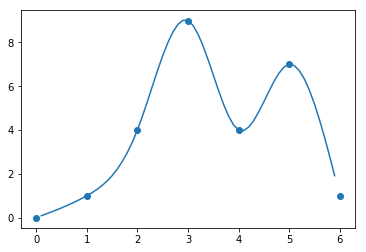

In [3]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6]
f = [0, 1, 4, 9, 4, 7, 1]
plt.scatter(x, f)

coef = build_spline(x, f)
_x = np.arange(0.1, 6, 0.1)
_y = [interpolate(i, coef, x) for i in _x]
plt.plot(_x, _y)

plt.show()

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

Let the function $y = f(x)$ have a fourth-order continuous derivative on the interval $[a, b]$ and $M_4 = max_{[a, b]}|f^{(4)}(x)|$. Then, for cubic spline $S_3(x)$, satisfying the boundary conditions, the following error estimate holds: $max_{[a, b]}|f^{(p)}(x) - S_3^{(p)}(x)| ≤ С_pM_4h_{max}^{4 - p}, p=[1,2,3], h_{max} = max_{1 ≤ i ≤ n}h_i$

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

The complexity is $O(n)$, because Tridiagonal matrix algorithm has complexity $O(n)$ and building of Tridiagonal matrix has complexity $O(n)$.

### Congrats!